In [30]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from Arwin.src.utils import *
from Arwin.src.plot_utils import visualize_progress
from Arwin.model.deeponet import DeepONetJan

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
obs_grid = "0.00000 0.01655 0.15919 0.24905 0.29006 0.30446 0.39510 0.42565 0.78071  0.81144 0.86129 1.12182 1.16295 1.25325 1.35370 1.49287 1.49297 1.56871  1.76575 1.82864 1.92638 2.09676 2.13355 2.28019 2.81731 3.09067 3.10432  3.11190 3.17887 3.20588 3.44467 3.58279 3.59577 3.68485 3.72983 3.77016  3.78107 3.92414 3.92761 4.07839 4.12542 4.17577 4.22038 4.27561 4.30205  4.49623 4.50518 4.54535 4.68963 4.93962 5.00990 5.24548 5.29000 5.44630  5.45443 5.83972 6.00810 6.13303 6.28199 6.29398 6.42915 6.43669 6.50978  6.75474 6.79604 6.87519 7.06211 7.06747 7.15659 7.23784 7.32259 7.60223  7.68895 7.74670 7.95645 7.96913 8.00073 8.03321 8.17974 8.19224 8.20451  8.20665 8.23454 8.28234 8.39524 8.43674 8.47082 8.53114 8.86427 9.12404  9.13575 9.16591 9.27560 9.35011 9.49468 9.72673 9.76110 9.78417 9.94007  9.94213 9.97769"
obs_values = "0.91439 0.97635 1.20189 1.03939 1.46133 1.16308 1.36301 1.43713 1.88652  1.87896 1.95268 2.04316 2.16378 2.23316 2.27926 2.59367 2.43617 2.68753  2.99157 2.82877 2.81315 3.05565 3.15509 3.19748 3.84524 4.13880 4.11655  4.16342 4.02985 4.38005 4.45384 4.56963 4.50776 4.70608 4.78789 4.81009  4.98589 4.91870 4.79854 5.01601 5.05351 5.05778 5.23749 5.34266 5.20461  5.60769 5.37977 5.64483 5.57274 5.86678 6.12917 6.29902 6.30964 6.41478  6.41346 6.69523 7.21553 6.95940 7.31641 7.33596 7.46297 7.36429 7.57528  7.97171 7.84129 7.85876 8.09428 8.03878 8.31344 8.24537 8.32781 8.42724  8.54750 8.89511 8.96479 9.09824 8.82021 9.01312 9.08032 9.05094 9.18115  9.09716 9.26142 9.17984 9.47654 9.65293 9.38973 9.52829 9.77890 10.17076  10.18077 10.09411 10.19470 10.20672 10.32078 10.72092 10.74860 10.84097  10.75360 10.73513 11.01702"
evaluation_grid = "0.00000 0.07874 0.15748 0.23622 0.31496 0.39370 0.47244 0.55118 0.62992  0.70866 0.78740 0.86614 0.94488 1.02362 1.10236 1.18110 1.25984 1.33858  1.41732 1.49606 1.57480 1.65354 1.73228 1.81102 1.88976 1.96850 2.04724  2.12598 2.20472 2.28346 2.36220 2.44094 2.51969 2.59843 2.67717 2.75591  2.83465 2.91339 2.99213 3.07087 3.14961 3.22835 3.30709 3.38583 3.46457  3.54331 3.62205 3.70079 3.77953 3.85827 3.93701 4.01575 4.09449 4.17323  4.25197 4.33071 4.40945 4.48819 4.56693 4.64567 4.72441 4.80315 4.88189  4.96063 5.03937 5.11811 5.19685 5.27559 5.35433 5.43307 5.51181 5.59055  5.66929 5.74803 5.82677 5.90551 5.98425 6.06299 6.14173 6.22047 6.29921  6.37795 6.45669 6.53543 6.61417 6.69291 6.77165 6.85039 6.92913 7.00787  7.08661 7.16535 7.24409 7.32283 7.40157 7.48031 7.55906 7.63780 7.71654  7.79528 7.87402 7.95276 8.03150 8.11024 8.18898 8.26772 8.34646 8.42520  8.50394 8.58268 8.66142 8.74016 8.81890 8.89764 8.97638 9.05512 9.13386  9.21260 9.29134 9.37008 9.44882 9.52756 9.60630 9.68504 9.76378 9.84252  9.92126 10.00000"
evaluation_values = "1.00000 1.07874 1.15748 1.23622 1.31496 1.39370 1.47244 1.55118 1.62992  1.70866 1.78740 1.86614 1.94488 2.02362 2.10236 2.18110 2.25984 2.33858  2.41732 2.49606 2.57480 2.65354 2.73228 2.81102 2.88976 2.96850 3.04724  3.12598 3.20472 3.28346 3.36220 3.44094 3.51969 3.59843 3.67717 3.75591  3.83465 3.91339 3.99213 4.07087 4.14961 4.22835 4.30709 4.38583 4.46457  4.54331 4.62205 4.70079 4.77953 4.85827 4.93701 5.01575 5.09449 5.17323  5.25197 5.33071 5.40945 5.48819 5.56693 5.64567 5.72441 5.80315 5.88189  5.96063 6.03937 6.11811 6.19685 6.27559 6.35433 6.43307 6.51181 6.59055  6.66929 6.74803 6.82677 6.90551 6.98425 7.06299 7.14173 7.22047 7.29921  7.37795 7.45669 7.53543 7.61417 7.69291 7.77165 7.85039 7.92913 8.00787  8.08661 8.16535 8.24409 8.32283 8.40157 8.48031 8.55906 8.63780 8.71654  8.79528 8.87402 8.95276 9.03150 9.11024 9.18898 9.26772 9.34646 9.42520  9.50394 9.58268 9.66142 9.74016 9.81890 9.89764 9.97638 10.05512 10.13386  10.21260 10.29134 10.37008 10.44882 10.52756 10.60630 10.68504 10.76378  10.84252 10.92126 11.00000"

obs_grid = np.array(obs_grid.split(), dtype=float) 
obs_values = np.array(obs_values.split(), dtype=float) 
evaluation_grid = np.array(evaluation_grid.split(), dtype=float) 
evaluation_values = np.array(evaluation_values.split(), dtype=float)

In [32]:
def transform_input(obs_grid, obs_values, evaluation_grid, evaluation_values):

    # get max padding length
    max_len = len(evaluation_grid)

    # convert to torch tensors
    funtion_grid = torch.tensor(evaluation_grid, dtype=torch.float32)
    function_values = torch.stack([torch.tensor(f, dtype=torch.float32) for f in evaluation_values])
    values = [torch.tensor(v, dtype=torch.float32) for v in obs_values.reshape(1, -1)]
    times = [torch.tensor(t, dtype=torch.float32) for t in obs_grid.reshape(1, -1)]

    # pad values and times
    padded_values = [F.pad(v, (0, max_len - len(v)), value=0) if len(v) < max_len else v[:max_len] for v in values]
    padded_times = [F.pad(t, (0, max_len - len(t)), value=0) if len(t) < max_len else t[:max_len] for t in times]
    
    # stack padded values and times
    padded_values = torch.stack(padded_values, dim=0)
    padded_times = torch.stack(padded_times, dim=0)

    return funtion_grid, function_values, padded_times, padded_values


In [33]:
model = DeepONetJan(indicator_dim=128, d_model=128, heads=2, p=128).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=4.6e-4)
optimizers = {"model": optimizer}

deeponet, optimizers, epoch, stats  = load_model(model, optimizers, "checkpoint_epoch_5600_model_final.pth")
deeponet.eval()

eval_grid_points, true_values, times, values = transform_input(obs_grid, obs_values, evaluation_grid, evaluation_values)

times, values, eval_grid_points, true_values = times.to(device), values.to(device), eval_grid_points.to(device), true_values.to(device)

output_fun_at_eval_grid = deeponet(values, times, eval_grid_points).detach().cpu().numpy()

RMSE:  28.533434823932403


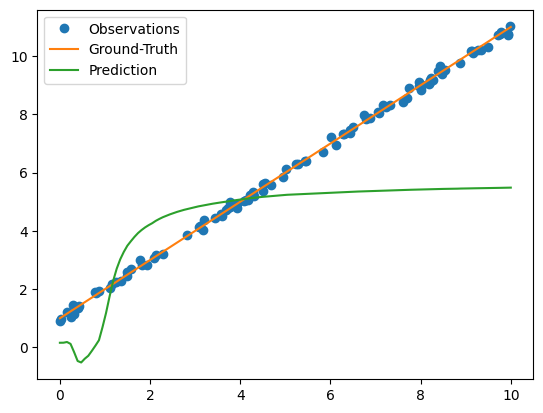

In [34]:
rmse = np.sqrt(((evaluation_values - output_fun_at_eval_grid)**2).sum()) 
print("RMSE: ", rmse)

plt.plot(obs_grid, obs_values, linestyle="None", marker="o", label="Observations")
plt.plot(evaluation_grid, evaluation_values, label="Ground-Truth")
plt.plot(evaluation_grid, output_fun_at_eval_grid, label="Prediction")
plt.legend()
plt.show()

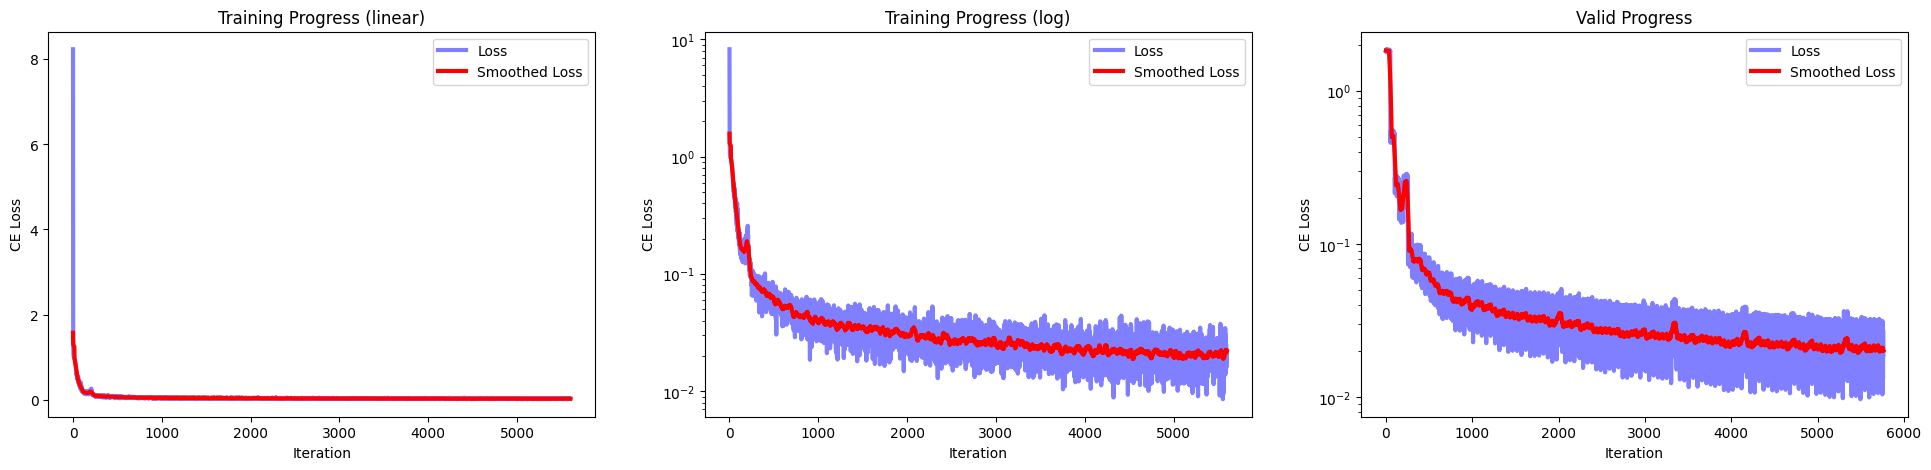

In [35]:
visualize_progress(stats["train_loss"], stats["valid_loss"])